In [34]:
from livelossplot.tf_keras import PlotLossesCallback
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


import tensorflow as tf

from sklearn.metrics import confusion_matrix
from sklearn import metrics

import numpy as np
np.random.seed(42)
import warnings;warnings.simplefilter('ignore')
%matplotlib inline
print('Tensorflow version:',tf.__version__)


Tensorflow version: 2.2.0


In [49]:
train_images = pd.read_csv('Dataset/train/images.csv',header=None)
train_labels = pd.read_csv('Dataset/train/labels.csv',header=None)

val_images = pd.read_csv('Dataset/validation/images.csv',header=None)
val_labels = pd.read_csv('Dataset/validation/labels.csv',header=None)

In [50]:
train_images.head(3)

,0,1,2,3,4,5,6,7,8,9,...,8182,8183,8184,8185,8186,8187,8188,8189,8190,8191
0,0.631373,0.623529,0.713726,0.705882,0.658824,0.666667,0.654902,0.635294,0.647059,0.705882,...,0.682353,0.611765,0.650980,0.658824,0.600000,0.603922,0.654902,0.694118,0.658824,0.666667
1,0.725490,0.752941,0.749020,0.701961,0.690196,0.721569,0.709804,0.745098,0.654902,0.721569,...,0.721569,0.698039,0.721569,0.686275,0.713726,0.682353,0.690196,0.698039,0.701961,0.725490
2,0.717647,0.701961,0.713726,0.733333,0.705882,0.717647,0.725490,0.682353,0.717647,0.674510,...,0.709804,0.694118,0.705882,0.682353,0.639216,0.713726,0.670588,0.678431,0.737255,0.674510


In [51]:
train_labels.head(3)


,0,1,2,3
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0


In [52]:
print("training set shape:",train_images.shape,train_labels.shape)
print("valdation set shape:",val_images.shape,val_labels.shape)

training set shape: (42, 8192) (42, 4)
valdation set shape: (169, 8192) (169, 4)


In [56]:
x_train=train_images.values.reshape(42,64,128,1)
x_val=val_images.values.reshape(169,64,128,1)

y_train=train_labels.values
y_val=val_labels.values



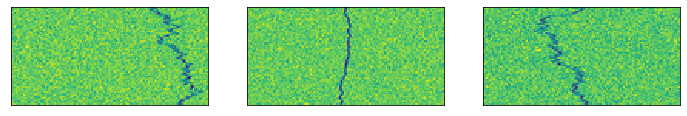

In [60]:
plt.figure(0,figsize=(12,12))
for i in range(1,4):
    plt.subplot(1,3,i);
    img=np.squeeze(x_train[np.random.randint(0,x_train.shape[0])])
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img)
    
    

In [59]:
x_train.shape

(42, 64, 128, 1)

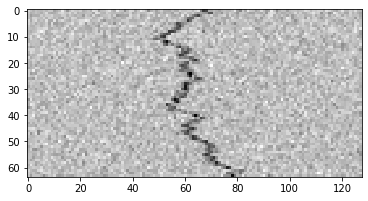

In [64]:
plt.imshow(np.squeeze(x_train[3]),cmap='gray')

In [68]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen_train= ImageDataGenerator(horizontal_flip=True)
datagen_train.fit(x_train)

datagen_val= ImageDataGenerator(horizontal_flip=True)
datagen_val.fit(x_train)

In [65]:
ImageDataGenerator?

Object `ImageDataGenerator` not found.


In [73]:
from tensorflow.keras.layers import Dense, Input, Dropout,Flatten,Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D

from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint

In [79]:
#initialising the cnn
model = Sequential()

#1st convolution
model.add(Conv2D(32, (5,5), padding='same', input_shape=(64,128,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

#2nd convolution layer
model.add(Conv2D(32,(5,5), padding ='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

#flattening
model.add(Flatten())

#fully connected layer
model.add(Dense(1024))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(4, activation='softmax'))



In [80]:
initial_learning_rate = 0.005
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=initial_learning_rate,decay_steps=5,decay_rate=0.96,staircase=True)
optimizer=Adam(learning_rate=lr_schedule)

In [94]:
model.compile(optimizer=optimizer,loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 64, 128, 32)       832       
_________________________________________________________________
batch_normalization_1 (Batch (None, 64, 128, 32)       128       
_________________________________________________________________
activation_1 (Activation)    (None, 64, 128, 32)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 64, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 64, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 64, 32)        25632     
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 64, 32)       

In [101]:
checkpoint = ModelCheckpoint('model_weight.h5',monitor='val_loss',save_weights_only=True, mode='min',verbose=0)
callbacks = [PlotLossesCallback(), checkpoint]

batch_size=32

history = model.fit(datagen_train.flow(x_train,y_train, batch_size=batch_size, shuffle= True), 
                    steps_per_epoch = len(x_train),
                    validation_data= datagen_val.flow(x_val,y_val,batch_size= batch_size, shuffle= True),
                    validation_steps= len(x_val) ,
                    epochs=12,
                    callbacks =callbacks)


KeyError: 'metrics'

In [100]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history=model.fit(x_train,y_train,epoch=12, batch_size=5, verbose=0)
scores = model.evaluate(x_train,y_train, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
cvscores.append(scores[1] * 100)

TypeError: fit() got an unexpected keyword argument 'epoch'